In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("sample.csv")

In [3]:
data.columns = ["u","target","y","x"]

In [4]:
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [5]:
from scipy.linalg import *
from numpy.linalg import matrix_rank

In [6]:
A = np.matrix([[1]])
B = np.matrix([[1]])
Q = np.eye(1)*0.01
R = 1
K0 = np.zeros((1,1))

In [7]:
target = 0.5

In [8]:
N = 200

x = data.y[:N+1].values.reshape(1,-1)
y = np.zeros((1, N+1)) # n * (N+1)
u = data.u[:N+1]

# x = np.zeros((1, N+1)) # n * (N+1)
# u = np.zeros(N)

In [9]:
# for i in range(N):
#     x[:,i] = y[:,i] - target
#     # u[i] = np.random.uniform() * 0.01 # default : 0.01
#     u[i] = -x[:,i]
#     y[:,i+1] = A.dot(y[:,i]).reshape(1,1) + B*u[i]

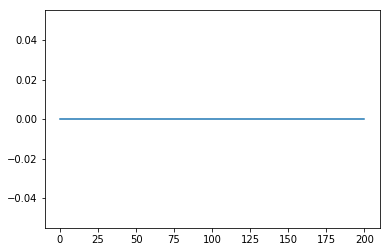

In [10]:
import matplotlib.pyplot as plt
plt.plot(y[0,:])
plt.show()

In [11]:
# P_1 : n * n
P_1 = np.zeros((1, 1)) 

# interation time
index = 1

errorK = []
errorH = []
INDEX = []

# H matrix: n+m+l * n+m+l
H = np.zeros((2, 2))

# H33 matrix: n * n
H33 = np.zeros((1, 1))

# H13 matrix: m * n
H13 = np.zeros((1, 1))

# H11 matrix: m * m
H11 = np.zeros(1)

# K: m * n
K = np.zeros((1, 1))

In [13]:
c = 0# b,m
while True:
    X = np.zeros((N-2*10+1, 3))
    Y = np.zeros(N-2*10+1)
    c += 1    
    for j in range(10-1, N-10): # 10 is a constant
        temp = np.hstack((u[j], x[:,j])).reshape(1,2) # n+m
        temp1 = kron(temp, temp)
        ind = [0,1,3]
        psi=temp1[0][ind];
        phi = x[:,j+1].dot((H33 - H13.transpose() * (1/(R + H11)).reshape(-1,1).dot(H13.reshape(1,-1)))).dot(x[:,j+1])
        
        X[j-9,:] = psi
        Y[j-9] = x[:,j+1].dot(Q).dot(x[:,j+1])+phi   
    # least square solution
    solution = lstsq(X, Y) # linear regression,
    pp = solution[0]
    residual = solution[1]
    # print(np.linalg.matrix_rank(X))
    # if rank == 21
    # else:
    #    need larger N    
    l = 0
    # temp5 : n+m+l * n+m+l
    temp5 = np.zeros((2, 2))
    for m in range(2):
        for n in range(m, 2):
            temp5[m, n] = pp[l]/2
            l += 1
    
    H = temp5 + temp5.transpose() 
    
    H33 = H[1, 1] # 
    H13 = H[0, 1] #
    H11 = H[0, 0] # m * m
    K = 1/(R + H11) * H13 # inv
    print(K)
    if (c >50):
        break

0.0931961982156
0.093582348143
0.0938992977216
0.094159284764
0.0943724368346
0.0945471171783
0.094690220018
0.0948074204917
0.0949033847847
0.0949819458607
0.0950462498038
0.0950988772716
0.0951419440195
0.0951771839173
0.095206017386
0.0952296077337
0.0952489074757
0.0952646963827
0.0952776127101
0.0952881788151
0.0952968221572
0.0953038925095
0.0953096760573
0.0953144069448
0.0953182767298
0.0953214421236
0.0953240313255
0.0953261492081
0.0953278815595
0.0953292985555
0.0953304575998
0.0953314056482
0.0953321811094
0.095332815401
0.0953333342219
0.0953337585925
0.0953341057072
0.09533438963
0.0953346218647
0.0953348118212
0.0953349671961
0.0953350942849
0.0953351982371
0.0953352832648
0.095335352813
0.0953354097
0.0953354562306
0.0953354942902
0.0953355254211
0.0953355508845
0.0953355717123
